# VLBA conversion guide

In [2]:
from importlib.metadata import version
import os

try:
    import xradio

    print("XRADIO version", version("xradio"), "already installed.")
except ImportError as e:
    print(e)
    print("Installing XRADIO")

    os.system("pip install xradio")

    import xradio

    print("xradio version", version("xradio"), " installed.")

XRADIO version 0.0.41 already installed.


## Download dataset

Original VLBA dataset gotten from https://casaguides.nrao.edu/index.php?title=VLBA_Basic_Phase-referencing_Calibration_and_Imaging.

Reduced the data using:

```Python
mstransform(vis='VLBA_TL016B.ms/',outputvis='VLBA_TL016B_split_lsrk.ms',spw='0:0~5,1:0~5',field='0,1', timerange='2022/02/21/06:14:00~2022/02/21/07:55:45.00', regridms=True,outframe='lsrk',datacolumn='all')
```




In [3]:
import toolviper

toolviper.utils.data.download(file="VLBA_TL016B_split.ms")

[2024-10-14 16:08:41,822]  WARNING   toolviper:  File exists: /home/fedemp/ws_xradio_dev/venv_xradio_python312/lib/python3.12/site-packages/toolviper/utils/data/.dropbox 
[2024-10-14 16:08:41,826]     INFO   toolviper:  Updating file metadata information ...  
 

 Download List         
 ────────────────────── 
  VLBA_TL016B_split.ms

VLBA_TL016B_split.ms.zip:   0%|          | 0.00/8.97M [00:00<?, ?iB/s]

## Convert to Processing Set

In [4]:
from xradio.measurement_set import convert_msv2_to_processing_set

ms_file = "VLBA_TL016B_split.ms"

main_chunksize = {"frequency": 1, "time": 20}  # baseline, polarization
outfile = "VLBA_TL016B_split_lsrk.vis.zarr"
convert_msv2_to_processing_set(
    in_file=ms_file,
    out_file=outfile,
    parallel=False,
    overwrite=True,
    main_chunksize=main_chunksize,
)

[2024-10-14 16:08:51,339]     INFO   toolviper:  Partition scheme that will be used: ['DATA_DESC_ID', 'OBSERVATION_ID', 'FIELD_ID'] 
[2024-10-14 16:08:51,394]     INFO   toolviper:  Number of partitions: 4 
[2024-10-14 16:08:51,402]     INFO   toolviper:  OBSERVATION_ID [0], DDI [0], STATE [-1], FIELD [0], SCAN [0] 
with_pointing True
[2024-10-14 16:08:52,424]  WARNING   toolviper:  Source_id is -1. No source information will be included in the field_and_source_xds. 
[2024-10-14 16:08:52,640]     INFO   toolviper:  OBSERVATION_ID [0], DDI [0], STATE [-1], FIELD [1], SCAN [0] 
with_pointing True
[2024-10-14 16:08:53,200]  WARNING   toolviper:  Source_id is -1. No source information will be included in the field_and_source_xds. 
[2024-10-14 16:08:53,820]     INFO   toolviper:  OBSERVATION_ID [0], DDI [1], STATE [-1], FIELD [0], SCAN [0] 
with_pointing True
[2024-10-14 16:08:54,386]  WARNING   toolviper:  Source_id is -1. No source information will be included in the field_and_source_xds.

## Processing Set

In [5]:
from xradio.measurement_set import open_processing_set

ps = open_processing_set(ps_store=outfile)
ps.summary()

,name,intents,shape,polarization,scan_number,spw_name,field_name,source_name,line_name,field_coords,start_frequency,end_frequency
0,VLBA_TL016B_split_0,[obs_0],"(200, 55, 6, 2)","[RR, LL]",[0],spw_0,[4C39.25_0],[Unknown],[],"[fk5, 9h27m03.01s, 39d02m20.85s]",5.004000e+09,5.006500e+09
3,VLBA_TL016B_split_1,[obs_0],"(540, 55, 6, 2)","[RR, LL]",[0],spw_0,[J1154+6022_1],[Unknown],[],"[fk5, 11h54m04.54s, 60d22m20.82s]",5.004000e+09,5.006500e+09
2,VLBA_TL016B_split_2,[obs_0],"(200, 55, 6, 2)","[RR, LL]",[0],spw_1,[4C39.25_0],[Unknown],[],"[fk5, 9h27m03.01s, 39d02m20.85s]",5.068000e+09,5.070500e+09
1,VLBA_TL016B_split_3,[obs_0],"(540, 55, 6, 2)","[RR, LL]",[0],spw_1,[J1154+6022_1],[Unknown],[],"[fk5, 11h54m04.54s, 60d22m20.82s]",5.068000e+09,5.070500e+09


In [6]:
ps.keys()

dict_keys(['VLBA_TL016B_split_0', 'VLBA_TL016B_split_3', 'VLBA_TL016B_split_2', 'VLBA_TL016B_split_1'])

In [7]:
ps["VLBA_TL016B_split_3"]

<xarray.MeasurementSetXds> Size: 6MB
Dimensions:                     (baseline_id: 55, time: 540, frequency: 6,
                                 polarization: 2, uvw_label: 3)
Coordinates:
    baseline_antenna1_name      (baseline_id) <U2 440B dask.array<chunksize=(55,), meta=np.ndarray>
    baseline_antenna2_name      (baseline_id) <U2 440B dask.array<chunksize=(55,), meta=np.ndarray>
  * baseline_id                 (baseline_id) int64 440B 0 1 2 3 ... 51 52 53 54
    scan_number                 (time) int64 4kB dask.array<chunksize=(540,), meta=np.ndarray>
  * time                        (time) float64 4kB 1.645e+09 ... 1.645e+09
  * frequency                   (frequency) float64 48B 5.068e+09 ... 5.07e+09
  * polarization                (polarization) <U2 16B 'RR' 'LL'
  * uvw_label                   (uvw_label) <U1 12B 'u' 'v' 'w'
Data variables:
    EFFECTIVE_INTEGRATION_TIME  (time, baseline_id) float64 238kB dask.array<chunksize=(20, 55), meta=np.ndarray>
    FLAG                        (time, baseline_id, frequency, polarization) bool 356kB dask.array<chunksize=(20, 55, 1, 2), meta=np.ndarray>
    TIME_CENTROID               (time, baseline_id) float64 238kB dask.array<chunksize=(20, 55), meta=np.ndarray>
    UVW                         (time, baseline_id, uvw_label) float64 713kB dask.array<chunksize=(20, 55, 3), meta=np.ndarray>
    VISIBILITY                  (time, baseline_id, frequency, polarization) complex64 3MB dask.array<chunksize=(20, 55, 1, 2), meta=np.ndarray>
    WEIGHT                      (time, baseline_id, frequency, polarization) float32 1MB dask.array<chunksize=(20, 55, 1, 2), meta=np.ndarray>
Attributes: (12/13)
    creation_date:           2024-10-14T14:08:54.619011
    data_groups:             {'base': {'correlated_data': 'VISIBILITY', 'flag...
    observation_info:        {'observer': ['PLUTO'], 'project': 'TL016B', 're...
    partition_info:          {'field_name': ['J1154+6022_1'], 'intents': ['ob...
    processor_info:          {'sub_type': '', 'type': ''}
    schema_version:          4.0.-9994
    ...                      ...
    xradio_version:          0.0.41
    phase_calibration_xds:   <xarray.Dataset> Size: 115kB\nDimensions:       ...
    gain_curve_xds:          <xarray.Dataset> Size: 1kB\nDimensions:         ...
    antenna_xds:             <xarray.Dataset> Size: 1kB\nDimensions:         ...
    system_calibration_xds:  <xarray.Dataset> Size: 200kB\nDimensions:       ...
    weather_xds:             <xarray.Dataset> Size: 418kB\nDimensions:       ...

In [8]:
ant_xds = ps["VLBA_TL016B_split_3"].attrs["antenna_xds"]
ant_xds

<xarray.Dataset> Size: 1kB
Dimensions:                 (antenna_name: 10, cartesian_pos_label: 3,
                             receptor_label: 2)
Coordinates:
  * antenna_name            (antenna_name) <U2 80B 'BR' 'FD' 'HN' ... 'PT' 'SC'
  * cartesian_pos_label     (cartesian_pos_label) <U1 12B 'x' 'y' 'z'
    mount                   (antenna_name) <U6 240B dask.array<chunksize=(10,), meta=np.ndarray>
    polarization_type       (antenna_name, receptor_label) <U1 80B dask.array<chunksize=(10, 2), meta=np.ndarray>
  * receptor_label          (receptor_label) <U5 40B 'pol_0' 'pol_1'
    station                 (antenna_name) <U2 80B dask.array<chunksize=(10,), meta=np.ndarray>
    telescope_name          (antenna_name) <U4 160B dask.array<chunksize=(10,), meta=np.ndarray>
Data variables:
    ANTENNA_DISH_DIAMETER   (antenna_name) float64 80B dask.array<chunksize=(10,), meta=np.ndarray>
    ANTENNA_POSITION        (antenna_name, cartesian_pos_label) float64 240B dask.array<chunksize=(10, 3), meta=np.ndarray>
    ANTENNA_RECEPTOR_ANGLE  (antenna_name, receptor_label) float64 160B dask.array<chunksize=(10, 2), meta=np.ndarray>
Attributes:
    overall_telescope_name:  VLBA
    relocatable_antennas:    False
    type:                    antenna

In [9]:
ant_xds.ANTENNA_POSITION

<xarray.DataArray 'ANTENNA_POSITION' (antenna_name: 10, cartesian_pos_label: 3)> Size: 240B
dask.array<open_dataset-ANTENNA_POSITION, shape=(10, 3), dtype=float64, chunksize=(10, 3), chunktype=numpy.ndarray>
Coordinates:
  * antenna_name         (antenna_name) <U2 80B 'BR' 'FD' 'HN' ... 'PT' 'SC'
  * cartesian_pos_label  (cartesian_pos_label) <U1 12B 'x' 'y' 'z'
    mount                (antenna_name) <U6 240B dask.array<chunksize=(10,), meta=np.ndarray>
    station              (antenna_name) <U2 80B dask.array<chunksize=(10,), meta=np.ndarray>
    telescope_name       (antenna_name) <U4 160B dask.array<chunksize=(10,), meta=np.ndarray>
Attributes:
    coordinate_system:   geocentric
    frame:               GRS80
    origin_object_name:  earth
    type:                location
    units:               ['m', 'm', 'm']

In [10]:
ant_xds.ANTENNA_RECEPTOR_ANGLE

<xarray.DataArray 'ANTENNA_RECEPTOR_ANGLE' (antenna_name: 10, receptor_label: 2)> Size: 160B
dask.array<open_dataset-ANTENNA_RECEPTOR_ANGLE, shape=(10, 2), dtype=float64, chunksize=(10, 2), chunktype=numpy.ndarray>
Coordinates:
  * antenna_name       (antenna_name) <U2 80B 'BR' 'FD' 'HN' ... 'OV' 'PT' 'SC'
    mount              (antenna_name) <U6 240B dask.array<chunksize=(10,), meta=np.ndarray>
    polarization_type  (antenna_name, receptor_label) <U1 80B dask.array<chunksize=(10, 2), meta=np.ndarray>
  * receptor_label     (receptor_label) <U5 40B 'pol_0' 'pol_1'
    station            (antenna_name) <U2 80B dask.array<chunksize=(10,), meta=np.ndarray>
    telescope_name     (antenna_name) <U4 160B dask.array<chunksize=(10,), meta=np.ndarray>
Attributes:
    type:     quantity
    units:    ['rad']

In [11]:
ps["VLBA_TL016B_split_3"].VISIBILITY.attrs["field_and_source_xds"]

<xarray.Dataset> Size: 116B
Dimensions:             (sky_dir_label: 2)
Coordinates:
    field_name          <U12 48B ...
  * sky_dir_label       (sky_dir_label) <U3 24B 'ra' 'dec'
    source_name         <U7 28B ...
Data variables:
    FIELD_PHASE_CENTER  (sky_dir_label) float64 16B dask.array<chunksize=(2,), meta=np.ndarray>
Attributes:
    is_ephemeris:  False
    type:          field_and_source

In [12]:
ps["VLBA_TL016B_split_3"].attrs["weather_xds"]

<xarray.Dataset> Size: 418kB
Dimensions:         (station_name: 10, time_weather: 856, antenna_name: 10)
Coordinates:
  * antenna_name    (antenna_name) <U2 80B 'BR' 'FD' 'HN' ... 'OV' 'PT' 'SC'
  * station_name    (station_name) <U2 80B 'BR' 'FD' 'HN' ... 'OV' 'PT' 'SC'
  * time_weather    (time_weather) float64 7kB 5.152e+09 5.152e+09 ... 5.152e+09
Data variables:
    DEW_POINT       (station_name, time_weather) float64 68kB dask.array<chunksize=(10, 856), meta=np.ndarray>
    IONOS_ELECTRON  (station_name, time_weather) float64 68kB dask.array<chunksize=(10, 856), meta=np.ndarray>
    PRESSURE        (station_name, time_weather) float64 68kB dask.array<chunksize=(10, 856), meta=np.ndarray>
    TEMPERATURE     (station_name, time_weather) float64 68kB dask.array<chunksize=(10, 856), meta=np.ndarray>
    WIND_DIRECTION  (station_name, time_weather) float64 68kB dask.array<chunksize=(10, 856), meta=np.ndarray>
    WIND_SPEED      (station_name, time_weather) float64 68kB dask.array<chunksize=(10, 856), meta=np.ndarray>
Attributes:
    type:     weather

In [13]:
gain_curve_xds = ps["VLBA_TL016B_split_3"].attrs["gain_curve_xds"]
gain_curve_xds

<xarray.Dataset> Size: 1kB
Dimensions:                 (antenna_name: 10, poly_term: 1, receptor_label: 2)
Coordinates:
    antenna_id              (antenna_name) int32 40B dask.array<chunksize=(10,), meta=np.ndarray>
  * antenna_name            (antenna_name) <U2 80B 'BR' 'FD' 'HN' ... 'PT' 'SC'
    gain_curve_type         (antenna_name) <U9 360B dask.array<chunksize=(10,), meta=np.ndarray>
    mount                   (antenna_name) <U6 240B dask.array<chunksize=(10,), meta=np.ndarray>
    polarization_type       (antenna_name, receptor_label) <U1 80B dask.array<chunksize=(10, 2), meta=np.ndarray>
  * receptor_label          (receptor_label) <U5 40B 'pol_0' 'pol_1'
    station                 (antenna_name) <U2 80B dask.array<chunksize=(10,), meta=np.ndarray>
    telescope_name          (antenna_name) <U4 160B dask.array<chunksize=(10,), meta=np.ndarray>
Dimensions without coordinates: poly_term
Data variables:
    GAIN_CURVE              (antenna_name, poly_term, receptor_label) float64 160B dask.array<chunksize=(10, 1, 2), meta=np.ndarray>
    GAIN_CURVE_INTERVAL     (antenna_name) float64 80B dask.array<chunksize=(10,), meta=np.ndarray>
    GAIN_CURVE_SENSITIVITY  (antenna_name, receptor_label) float64 160B dask.array<chunksize=(10, 2), meta=np.ndarray>
Attributes:
    measured_date:  2022-02-21T09:50:25.000000000
    type:           gain_curve

In [14]:
phase_calibration_xds = ps["VLBA_TL016B_split_3"].attrs["phase_calibration_xds"]
phase_calibration_xds

<xarray.Dataset> Size: 115kB
Dimensions:                   (antenna_name: 10, time_phase_cal: 141,
                               receptor_label: 2, tone_label: 2)
Coordinates:
    antenna_id                (antenna_name) int32 40B dask.array<chunksize=(10,), meta=np.ndarray>
  * antenna_name              (antenna_name) <U2 80B 'BR' 'FD' ... 'PT' 'SC'
    mount                     (antenna_name) <U6 240B dask.array<chunksize=(10,), meta=np.ndarray>
    polarization_type         (antenna_name, receptor_label) <U1 80B dask.array<chunksize=(10, 2), meta=np.ndarray>
  * receptor_label            (receptor_label) <U5 40B 'pol_0' 'pol_1'
    station                   (antenna_name) <U2 80B dask.array<chunksize=(10,), meta=np.ndarray>
    telescope_name            (antenna_name) <U4 160B dask.array<chunksize=(10,), meta=np.ndarray>
  * time_phase_cal            (time_phase_cal) float64 1kB 1.645e+09 ... 1.64...
  * tone_label                (tone_label) <U6 48B 'freq_0' 'freq_1'
Data variables:
    PHASE_CAL                 (antenna_name, time_phase_cal, receptor_label, tone_label) complex64 45kB dask.array<chunksize=(10, 141, 2, 2), meta=np.ndarray>
    PHASE_CAL_CABLE_CAL       (antenna_name, time_phase_cal) float64 11kB dask.array<chunksize=(10, 141), meta=np.ndarray>
    PHASE_CAL_INTERVAL        (antenna_name, time_phase_cal) float64 11kB dask.array<chunksize=(10, 141), meta=np.ndarray>
    PHASE_CAL_TONE_FREQUENCY  (antenna_name, time_phase_cal, receptor_label, tone_label) float64 45kB dask.array<chunksize=(10, 141, 2, 2), meta=np.ndarray>
Attributes:
    type:     phase_calibration

In [15]:
system_calibration_xds = ps["VLBA_TL016B_split_3"].attrs["system_calibration_xds"]
system_calibration_xds

<xarray.Dataset> Size: 200kB
Dimensions:         (antenna_name: 10, time_cal: 1192, receptor_label: 2)
Coordinates:
  * antenna_name    (antenna_name) <U2 80B 'BR' 'FD' 'HN' ... 'OV' 'PT' 'SC'
  * receptor_label  (receptor_label) int64 16B 0 1
  * time_cal        (time_cal) float64 10kB 5.152e+09 5.152e+09 ... 5.152e+09
Data variables:
    TSYS            (antenna_name, time_cal, receptor_label) float64 191kB dask.array<chunksize=(10, 1192, 2), meta=np.ndarray>
Attributes:
    type:     system_calibration

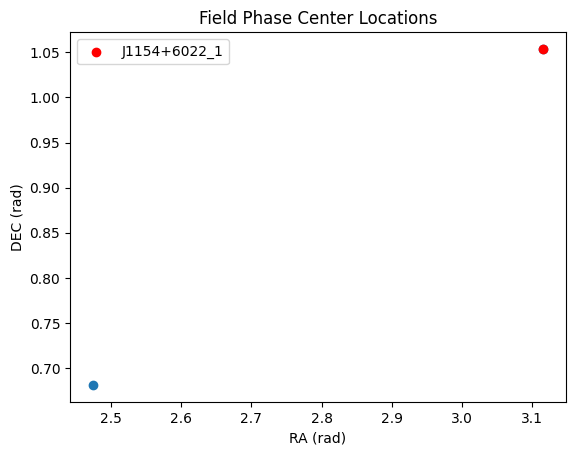

In [16]:
ps.plot_phase_centers()

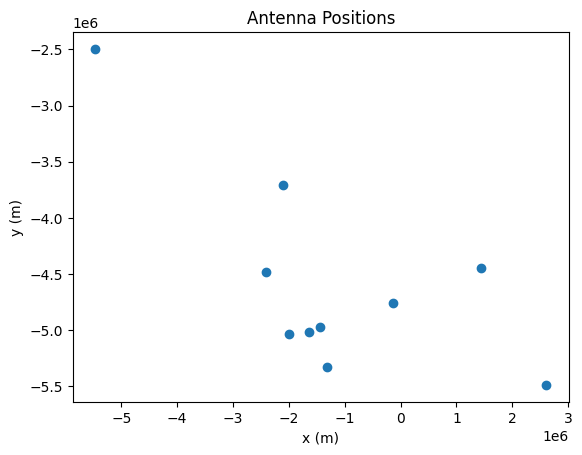

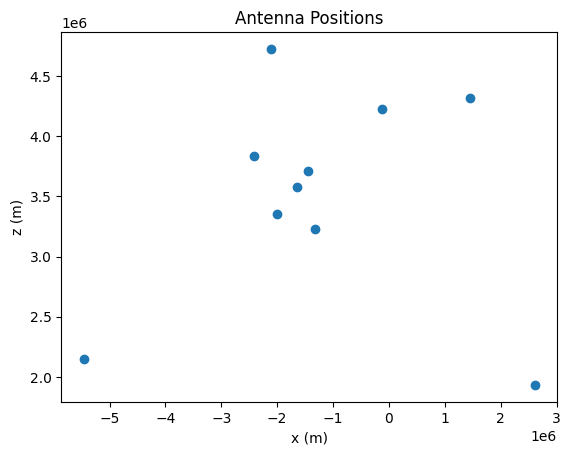

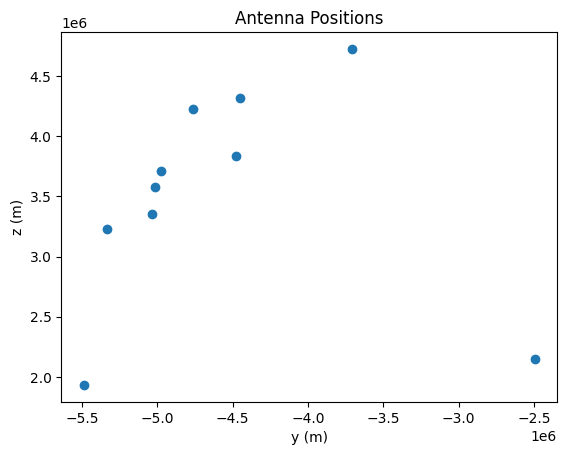

In [17]:
ps.plot_antenna_positions()